# Ensemble Techniques | Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


In [2]:
#1 Load the data set

park_data=pd.read_csv(r"C:\Users\Admin\Downloads\Parkinsons.data")

In [3]:
##2 eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of 
## attributes and a general idea of likely challenges in the data set.

park_data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
park_data.drop('name',axis=1, inplace=True)

In [5]:
park_data.tail(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


## Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation!!

In [6]:
park_data.sample(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
53,129.336,139.867,118.604,0.00490,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,...,0.04188,0.00484,25.429,0,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491
68,143.533,162.215,65.809,0.01101,0.00008,0.00647,0.00467,0.01941,0.05384,0.478,...,0.09455,0.04882,20.338,1,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580
152,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,1.018,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
19,156.405,189.398,142.822,0.00768,0.00005,0.00372,0.00399,0.01116,0.03995,0.348,...,0.05164,0.03365,17.153,1,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
111,208.519,220.315,199.020,0.00609,0.00003,0.00368,0.00339,0.01105,0.01761,0.155,...,0.02855,0.00830,22.407,1,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390


In [7]:
##3 Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic 
##  such as central values, spread, tails etc

park_data.describe

<bound method NDFrame.describe of      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
5        120.552       131.162       113.787         0.00968   
6        120.267       137.244       114.820         0.00333   
7        107.332       113.840       104.315         0.00290   
8         95.730       132.068        91.754         0.00551   
9         95.056       120.103        91.226         0.00532   
10        88.333       112.240        84.072         0.00505   
11        91.904       115.871        86.292         0.00540   
12       136.926       159.866       131.276         0.00293   
13       139.173       179.139        76.556         0.00390   
14    

In [8]:
park_data.info

<bound method DataFrame.info of      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
5        120.552       131.162       113.787         0.00968   
6        120.267       137.244       114.820         0.00333   
7        107.332       113.840       104.315         0.00290   
8         95.730       132.068        91.754         0.00551   
9         95.056       120.103        91.226         0.00532   
10        88.333       112.240        84.072         0.00505   
11        91.904       115.871        86.292         0.00540   
12       136.926       159.866       131.276         0.00293   
13       139.173       179.139        76.556         0.00390   
14      

In [9]:
park_data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
## this will help to print the column names of the parkinson data so that we have train data and test data

train_col=[]
for col in park_data.columns:
    train_col.append(col)
train_col

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [11]:
park_data.shape

(195, 23)

In [12]:
park_data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [13]:
park_data[park_data.status==1].head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
park_data[park_data.status==0].head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
35,201.464,210.565,195.708,0.00198,0.000010,0.00105,0.00115,0.00314,0.01194,0.107,...,0.01758,0.00135,31.732,0,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
42,237.226,247.326,225.227,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,0.164,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
43,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.03017,0.00675,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
44,243.439,250.912,232.435,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,0.126,...,0.02330,0.00454,25.368,0,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
45,242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,0.134,...,0.02542,0.00476,25.032,0,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706


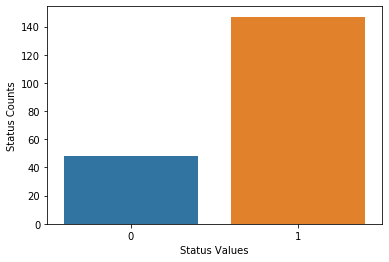

In [16]:
sns.countplot(park_data['status'].values)
plt.xlabel('Status Values')
plt.ylabel('Status Counts')
plt.show()

In [17]:
park_data.rename(columns={'MDVP:Fo(Hz)':'Fo',
 'MDVP:Fhi(Hz)':'Fhi',
 'MDVP:Flo(Hz)':'Flo',
 'MDVP:Jitter(%)':'Jitter',
 'MDVP:Jitter(Abs)':'JitterAbs',
 'MDVP:RAP':'RAP',
 'MDVP:PPQ':'PPQ',
 'Jitter:DDP':'DDP',
 'MDVP:Shimmer':'Shimmer',
 'MDVP:Shimmer(dB)':'dBShimmer',
 'Shimmer:APQ3':'APQ3',
 'Shimmer:APQ5':'APQ5',
 'MDVP:APQ':'APQ',
 'Shimmer:DDA':'DDA'}, inplace=True)

park_data.columns

Index(['Fo', 'Fhi', 'Flo', 'Jitter', 'JitterAbs', 'RAP', 'PPQ', 'DDP',
       'Shimmer', 'dBShimmer', 'APQ3', 'APQ5', 'APQ', 'DDA', 'NHR', 'HNR',
       'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [18]:
index_class=[]
for i in range(100):
    index_class.append(i)

ValueError: x and y must be the same size

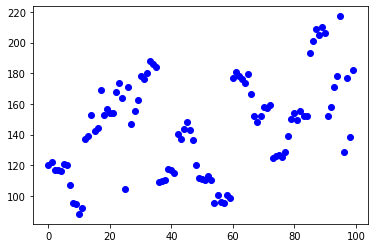

In [19]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].Fo[:100],color='b')
plt.scatter(x=index_class,y=park_data[park_data['status']==0].Fo[:100],color='r')
plt.show()

In [ ]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].Fhi[:100],color='b')
plt.scatter(x=index_class,y=park_data[park_data['status']==0].Fhi[:100],color='r')
plt.show()

ValueError: x and y must be the same size

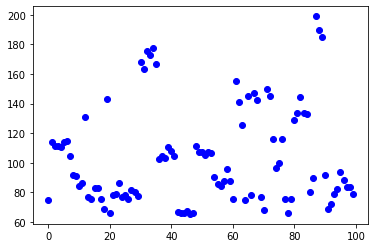

In [20]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].Flo[:100],color='b')
plt.scatter(x=index_class,y=park_data[park_data['status']==0].Flo[:100],color='r')
plt.show()

In [ ]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].Jitter[:100],color='b')
plt.scatter(x=index_class,y=park_data[park_data['status']==0].Jitter[:100],color='r')
plt.show()

ValueError: x and y must be the same size

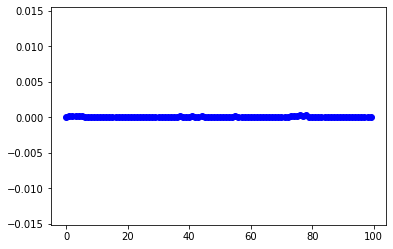

In [21]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].JitterAbs[:100],color='b')
plt.scatter(x=index_class,y=park_data[park_data['status']==0].JitterAbs[:100],color='r')
plt.show()

In [ ]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].RAP[:100],color='b')
plt.scatter(x=index_class,y=park_data[park_data['status']==0].RAP[:100],color='r')
plt.show()

In [ ]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].PPQ[:100],color='b')
plt.scatter(x=index_class,y=park_data[park_data['status']==0].PPQ[:100],color='r')
plt.show()

In [ ]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].DDP[:100],color='b')
plt.scatter(x=index_class,y=park_data[park_data['status']==0].DDP[:100],color='r')
plt.show()

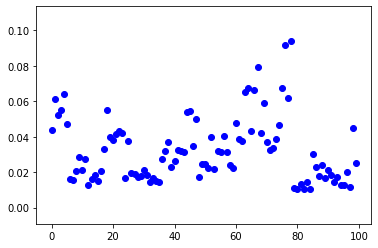

In [22]:
plt.scatter(x=index_class,y=park_data[park_data['status']==1].Shimmer[:100],color='b')
#plt.scatter(x=index_class,y=park_data[park_data['status']==0].Shimmer[:100],color='r')
plt.show()

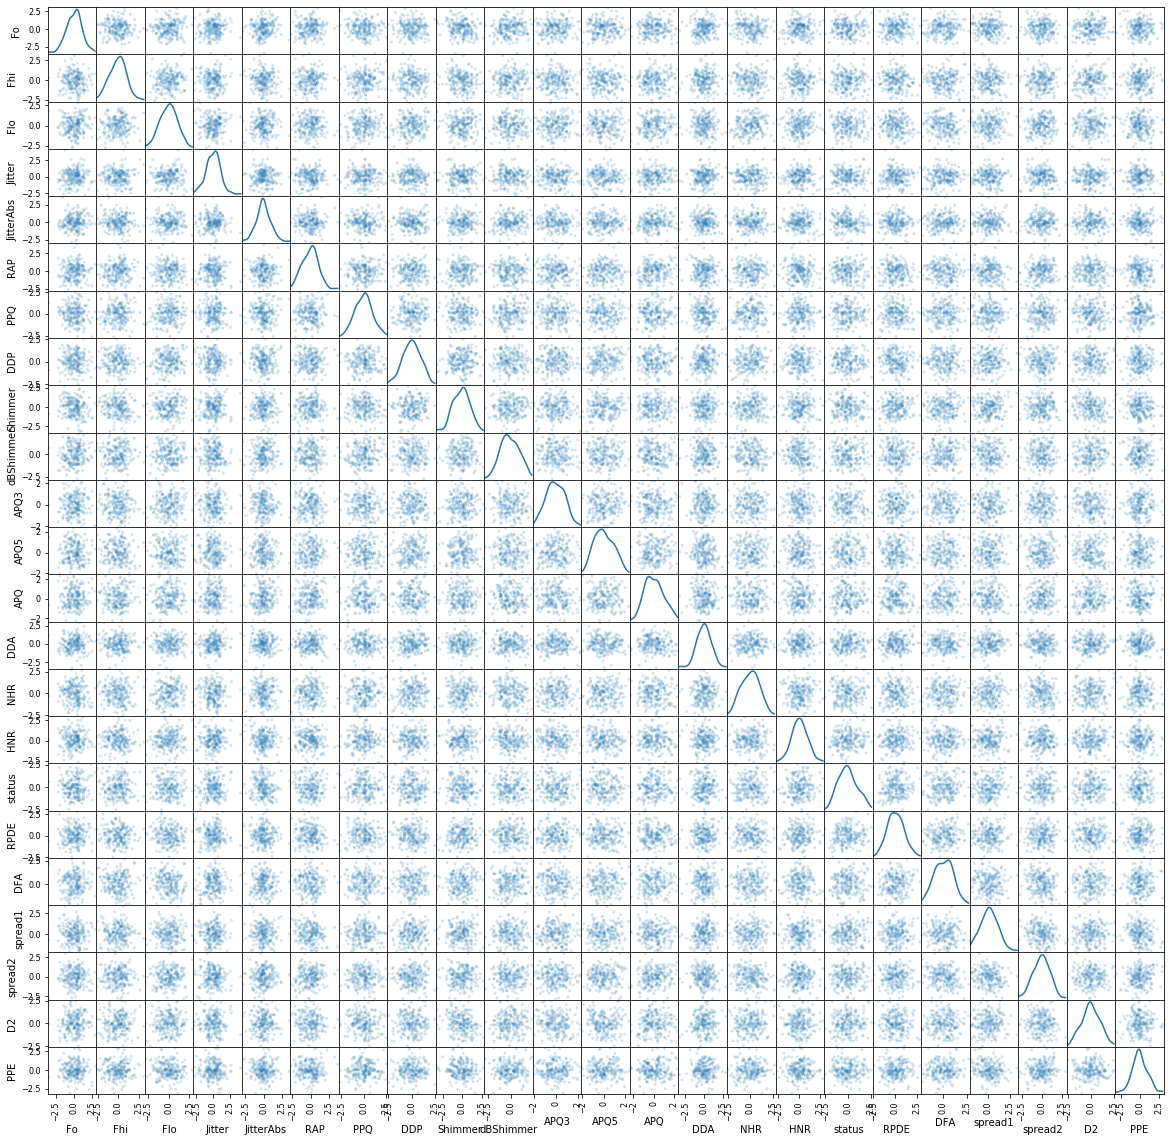

In [23]:
df = pd.DataFrame(np.random.randn(195, 23), columns=park_data.columns)
scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

In [24]:
park_data.corr()

,Fo,Fhi,Flo,Jitter,JitterAbs,RAP,PPQ,DDP,Shimmer,dBShimmer,...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
Fo,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
Fhi,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
Flo,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
Jitter,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
JitterAbs,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
dBShimmer,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Our data is a situation that summarizes the numerical relationships between each other. 
This corr () function reveals the correlation values between the data. 
As can be seen, the relationships are almost 1.0000 between the features each other.
The correlation between other features is close to 1.

In [25]:
#4 Split the data set into training and test set in the ratio of 70:30 (Training:Test)
X=park_data.drop('status',axis=1)
y=park_data['status']

In [26]:
X_train, X_test, train_labels, test_labels =train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',train_labels.shape)
print('y_test',test_labels.shape)

X_train (136, 22)
X_test (59, 22)
y_train (136,)
y_test (59,)


The difference in value between our data is too big. It increases both the volume and the results are very bad. 
To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [28]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
#5 Create the model using “entropy” method of reducing the entropy and fit it to training data
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state = 100 )

In [30]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [41]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Parkinson_Tree_File = open('parkinson_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Parkinson_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


ValueError: Length of feature_names, 136 does not match number of features, 22

In [42]:
dt_model.score(X_test , test_labels)

0.847457627118644

In [43]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng parkinson_tree.dot -o parkinson_tree.png")
Image("parkinson_tree.png")

FileNotFoundError: No such file or directory: 'parkinson_tree.png'

FileNotFoundError: No such file or directory: 'parkinson_tree.png'

<IPython.core.display.Image object>

In [31]:
#6 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab.
# calculate accuracy measures and confusion matrix
from sklearn import metrics

y_predict = dt_model.predict(X_test)

In [32]:
print(dt_model.score(X_train , train_labels))
print(dt_model.score(X_test , test_labels))

1.0
0.9152542372881356


In [36]:
#print(metrics.confusion_matrix(test_labels, y_predict))
cm=confusion_matrix(test_labels, y_predict)
print(cm)

[[13  0]
 [ 5 41]]


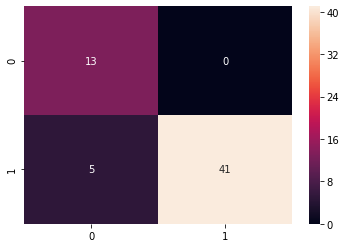

In [37]:
sns.heatmap(cm,annot=True)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, y_predict)
print(accuracy)

0.9152542372881356


In [ ]:
#7 Use regularization parameters of max_depth, min_sample_leaf to recreate the model.
## What is the impact on the model accuracy? How does regularization help?

In [44]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
# Print regularized tree

Parkinson_Tree_File = open('parkinson_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Parkinson_Tree_File.close()

system("dot -Tpng parkinson_tree_regularized.dot -o parkinson_tree_regularized.png")
Image("parkinson_tree_regularized.png")

ValueError: Length of feature_names, 136 does not match number of features, 22

In [47]:
dt_model.score(X_test , test_labels)

0.8305084745762712

In [49]:
y_predict = dt_model.predict(X_test)

In [51]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(test_labels, y_predict))

[[11  2]
 [ 8 38]]


In [ ]:
### Regularisation helps to improve the model

In [35]:
### Implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,train_labels)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)

In [59]:
dt_model.score(X_test , test_labels)

0.8305084745762712

In [61]:
y_predict = rfc.predict(X_test)
print(metrics.confusion_matrix(test_labels, y_predict))

[[11  2]
 [ 2 44]]
